# **Convolutional Nueral Nets and Computer Vision with TensorFlow**

Now we are getting to that good-good

## **Covered in this NB:**
* Architecture of a CNN
* An end-to-end examle of a NN
* Steps for modeling a binary image classification with CNN's
* Steps for modeling a multi-class image classification with CNN's

In [1]:
# getting the data

# DL the zip file
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2021-11-08 19:04:11--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.181.128, 64.233.183.128, 173.194.193.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.181.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   118MB/s    in 0.9s    

2021-11-08 19:04:12 (118 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspecting the data

This data is formatted in a way that is typical for workin with images. 
There is:

* a *train* directory which contains all training images with subdirectories each named after a certain class containing images of that class

* a seperate *test* directory containnig the same but for the testing data

* EX:

pizza_steak <- top level folder
> train <- training images
>> pizza
>>> xyz.jpg

>>> xyz.jpg

>>> ...

>> steak
>>> xyz.jpg

>>> xyz.jpg

>>> ...

> test <- testing images
>> pizza

>>> xyz.jpg

>>> xyz.jpg

>>> ...

>> steak

>>> xyz.jpg

>>> xyz.jpg

>>> ...


To inspect the data we use the '1s' command which stands for list

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza


1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

### Thats alotta images broh! How many tho?????

In [5]:
import os

# walk through the pizza_steak directory and list the number of files 
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

there are 2 directories and 1 images in "pizza_steak".
there are 2 directories and 1 images in "pizza_steak/test".
there are 0 directories and 250 images in "pizza_steak/test/steak".
there are 0 directories and 250 images in "pizza_steak/test/pizza".
there are 2 directories and 1 images in "pizza_steak/train".
there are 0 directories and 750 images in "pizza_steak/train/steak".
there are 0 directories and 750 images in "pizza_steak/train/pizza".


In [6]:
# Another way to find out how many images are in the file using the directory
n_steak_train = len(os.listdir('pizza_steak/train/steak/'))
n_steak_train

750

In [7]:
# Get class names (helpful when classes is many)
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train/') # turns training path into python path

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

print(class_names)

['.DS_Store' 'pizza' 'steak']


In [8]:
# view an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

def view_rand_image(target_dir, target_class):
  # set up directory to view images from
  target_folder = target_dir+target_class

  # get a random image path
  random_image = random.sample(os.listdir(target_folder),1)

  # read in the image and plot it with matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f'Image shape: {img.shape}')
  return img

Image shape: (512, 511, 3)


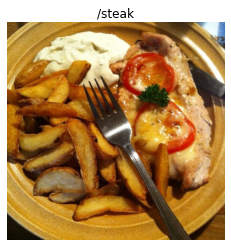

In [9]:
img = view_rand_image(target_dir='pizza_steak/train', target_class='/steak')

In [10]:
img

array([[[116,  78,  15],
        [116,  78,  15],
        [125,  87,  24],
        ...,
        [ 78, 129, 192],
        [ 76, 131, 198],
        [ 71, 130, 200]],

       [[116,  78,  16],
        [117,  79,  17],
        [127,  89,  26],
        ...,
        [ 81, 131, 194],
        [ 72, 125, 191],
        [ 71, 128, 197]],

       [[113,  77,  15],
        [113,  77,  15],
        [122,  86,  24],
        ...,
        [ 87, 137, 198],
        [ 76, 129, 195],
        [ 70, 127, 194]],

       ...,

       [[ 16,   9,   1],
        [ 18,  11,   3],
        [ 19,  12,   4],
        ...,
        [110,  69,  13],
        [102,  61,   5],
        [100,  59,   3]],

       [[ 20,  13,   5],
        [ 20,  13,   5],
        [ 19,  12,   4],
        ...,
        [108,  67,  11],
        [104,  63,   7],
        [103,  62,   8]],

       [[ 22,  15,   7],
        [ 19,  12,   4],
        [ 15,   8,   0],
        ...,
        [106,  65,   9],
        [109,  68,  12],
        [109,  68,  14]]

The entire food 101 dataset is comprised of similar images from 101 classes. TFlow sees the image as a large tensor in the form of 

(Width, Height, Color Channels)

In this dataset the heights and widths vary, but we always have 3 color channels representing values of RGB pixels.



## Typical Architecture Of Convolutional Neural Networks:

|**Hyperparameter/Layer type**|**function**|**tf values**|
|---|---|---|
| Input images  | target imagers you want to discover patterns in  |jpg's and such|
| Input layer  |  takes in images and preprocesses them for further layers |input_shape = [batch_size, image_height, image_width, color_channels] |
| Convolutional layer  | learns the most important features from target images  | Multiple, can create with tf.keras.layers.ConvXD (X can be multiple values)|
| Hidden activation  | adds non linearity to learned features  |Usually ReLU (tf.keras.activations.relu)|
| Pooling layer  | reduces dimensionality of learned image features |Average (tf.keras.layers.AvgPool2D) or Max (tf.keras.layers.MaxPool2D)|
| Fully connected layer | further refines learned features from convolution layers  |tf.keras.layers.Dense|
| Output layer |Takes learned features and outputs them in shape of target labels|output_shape = [number_of_classes] (e.g. 3 for pizza, steak or sushi)|
| Output activation |	Adds non-linearities to output layer|tf.keras.activations.sigmoid (binary classification) or tf.keras.activations.softmax|

## An end-to-end Example:

The original dataset got an accuracy of 50.76% using a random forest model

(our goal is to do *better*)

To start we will make a model then dive into the layers later

### Image Preprocessing

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# set seed
tf.random.set_seed(42)

# normalize the data so that the values are between 0 and 1
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# set up the test and train directories
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Import data from directories and turn it into batches
# Then make all images the same size - (224, 224, 3)

train_data = train_datagen.flow_from_directory(train_dir, 
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)
test_data = valid_datagen.flow_from_directory(test_dir, 
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode='binary',
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [12]:
# create model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters = 10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.MaxPool2D(pool_size=2,
                                    padding='valid'),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.Conv2D(10, 3, activation='relu'),
          tf.keras.layers.MaxPool2D(2),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
history_1 = model_1.fit(train_data, epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 43s 270ms/step - loss: 0.5792 - accuracy: 0.7120 - val_loss: 0.3897 - val_accuracy: 0.8200
Epoch 2/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4258 - accuracy: 0.8120 - val_loss: 0.3347 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 12s 246ms/step - loss: 0.4034 - accuracy: 0.8240 - val_loss: 0.3122 - val_accuracy: 0.8720
Epoch 4/5
47/47 [==============================] - 12s 245ms/step - loss: 0.3769 - accuracy: 0.8433 - val_loss: 0.3443 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3500 - accuracy: 0.8573 - val_loss: 0.2923 - val_accuracy: 0.8740


In [13]:
# Noice, this model beat 50.76% and has an accuracy of around 88%
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [14]:
# Now lets try a NN with the same architecture as the previous module

model_2 = tf.keras.Sequential([
         tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
         tf.keras.layers.Dense(4, activation = 'relu'),
         tf.keras.layers.Dense(3, activation = 'relu'),
         tf.keras.layers.Dense(1, activation = 'sigmoid')                    
         ])
model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
history_2 = model_2.fit(train_data, epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(train_data))



Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.9375 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5060
Epoch 2/5
47/47 [==============================] - 8s 165ms/step - loss: 0.6856 - accuracy: 0.5513
Epoch 3/5
47/47 [==============================] - 8s 162ms/step - loss: 0.6553 - accuracy: 0.6187
Epoch 4/5
47/47 [==============================] - 8s 163ms/step - loss: 0.6222 - accuracy: 0.6967
Epoch 5/5
47/47 [==============================] - 8s 163ms/step - loss: 0.6030 - accuracy: 0.7440


In [15]:
# Our model ran, but... it learned nothing. Likely just classified everything one way
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 4         
Total params: 602,135
Trainable params: 602,135
Non-trainable params: 0
_________________________________________________________________



 There are way more parameters to train in model 2, but that doesnt seem to matter.

 Whats more important is what the models are using to learn the patterns. CNN's seek to sort out and learn the most important patterns in an image. So, even though there are less learnable parameters, the params which are learning are doing a much better job at deciphering features in an image.



In [16]:
# Lets try a more complex model based on module 3

# set seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
          tf.keras.layers.Dense(100, activation = 'relu'),
          tf.keras.layers.Dense(100, activation = 'relu'),
          tf.keras.layers.Dense(100, activation = 'relu'),
          tf.keras.layers.Dense(1, activation = 'sigmoid')                     
])

model_3.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

history_3 = model_3.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_steps = len(train_data),
                        validation_data = test_data)

Epoch 1/5
47/47 [==============================] - 11s 232ms/step - loss: 3.0895 - accuracy: 0.6180 - val_loss: 0.6013 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 8s 166ms/step - loss: 1.2392 - accuracy: 0.6927
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.9037 - accuracy: 0.7140
Epoch 4/5
47/47 [==============================] - 8s 166ms/step - loss: 0.6086 - accuracy: 0.7460
Epoch 5/5
47/47 [==============================] - 8s 164ms/step - loss: 0.8110 - accuracy: 0.7240


In [17]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Oh my! thats alotta parameters!

Obviously the CNN is doing something much better than the regular-ass NN's we've been creating. Lets dive DEEPER

## CNN: A Deeper Look Into Our Example



### Preprocessing

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


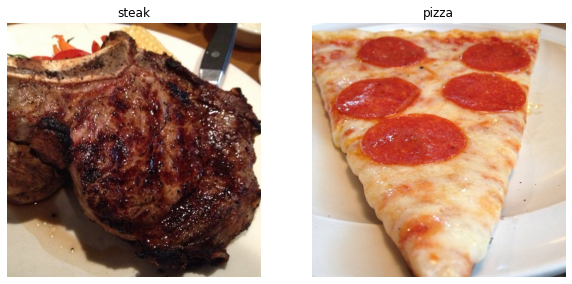

In [18]:
# visualize data, make sure labels match, etc
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
steak_img = view_rand_image('pizza_steak/train/', 'steak')
plt.subplot(1,2,2)
pizza_img = view_rand_image('pizza_steak/train/', 'pizza')

In [19]:
# Preprocess data - ours is already done basically -
# defining training and test directories

train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'


### Batching the data

In [20]:
# Create train and test genertators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1/255) #normalizing + creating instance
test_datagen = ImageDataGenerator(rescale = 1/255) #normalizing
type(train_datagen)


keras.preprocessing.image.ImageDataGenerator

In [21]:
# Turn data into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size = (224,224),
                                               class_mode = 'binary',
                                               batch_size = 32)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                             target_size = (224,224),
                                             class_mode='binary',
                                             batch_size = 32)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Note:
* because of how the directories are structured, the classes get inferred by the subdirectory names in train_dir & test_dir
* the target_size parameter defines the input size of our images
* class_mode is either binary or categpriocal
* the batch_size defines how many images will be in each batch

In [22]:
images, labels = train_data.next() # ge tht next batch of images/labels
len(images), len(labels)

(32, 32)

In [23]:
# see first couple of images
images[:2], images[0].shape

(array([[[[0.16470589, 0.16078432, 0.14509805],
          [0.16470589, 0.16078432, 0.14509805],
          [0.16470589, 0.14901961, 0.13725491],
          ...,
          [0.08627451, 0.07843138, 0.09803922],
          [0.09803922, 0.09019608, 0.10980393],
          [0.09411766, 0.08627451, 0.10588236]],
 
         [[0.18039216, 0.15294118, 0.12941177],
          [0.18823531, 0.16078432, 0.13725491],
          [0.1764706 , 0.14509805, 0.13333334],
          ...,
          [0.07450981, 0.06666667, 0.08627451],
          [0.08627451, 0.07843138, 0.09803922],
          [0.08235294, 0.07450981, 0.09411766]],
 
         [[0.16470589, 0.12941177, 0.10980393],
          [0.19215688, 0.15686275, 0.13725491],
          [0.17254902, 0.13725491, 0.11764707],
          ...,
          [0.08235294, 0.07450981, 0.09411766],
          [0.09019608, 0.08235294, 0.10196079],
          [0.09411766, 0.08627451, 0.10588236]],
 
         ...,
 
         [[0.12941177, 0.1137255 , 0.10980393],
          [0.11764

In [24]:
labels

array([0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1.],
      dtype=float32)

In [25]:
## Create the model -- Start with a baseline
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
          Conv2D(filters=10,
              kernel_size=3,
              strides=1,
              padding='valid',
              activation='relu',
              input_shape=(224, 224, 3)),
          Conv2D(10, 3, activation = 'relu'),
          Conv2D(10, 3, activation = 'relu'),
          Flatten(),
          Dense(1, activation = 'sigmoid')
])

In [27]:
# compile the model
model_4.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])


In [28]:
# fit the model
history_4 = model_4.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 259ms/step - loss: 1.5152 - accuracy: 0.5993 - val_loss: 0.5157 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 12s 245ms/step - loss: 0.4687 - accuracy: 0.7947 - val_loss: 0.4331 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 12s 247ms/step - loss: 0.3525 - accuracy: 0.8553 - val_loss: 0.3902 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.1841 - accuracy: 0.9400 - val_loss: 0.3543 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 12s 253ms/step - loss: 0.0903 - accuracy: 0.9740 - val_loss: 0.4372 - val_accuracy: 0.8140


### Evaluate The Model

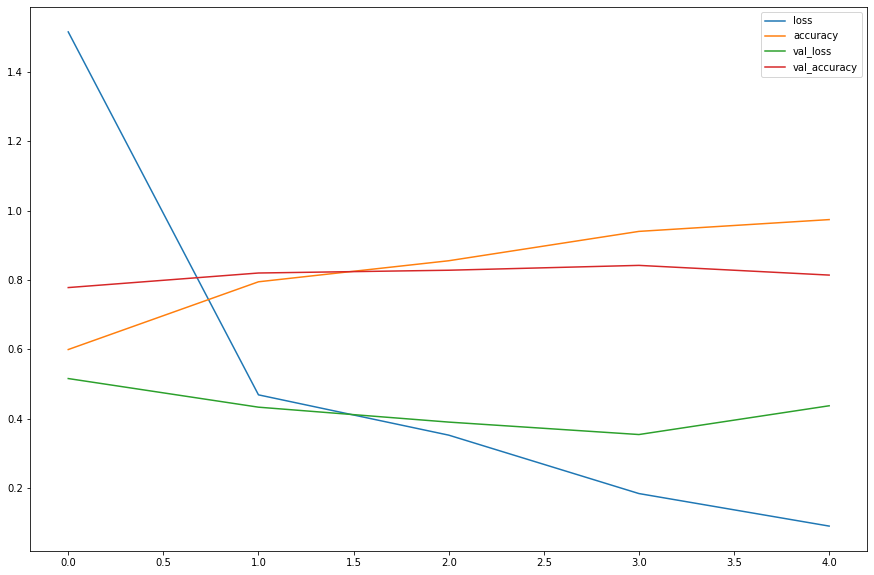

In [29]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (15, 10))

This model may be overfitting, judging by the loss curves. 

* When a model's validation loss starts to increase, it's likely that it's overfitting the training dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.

In [30]:
# seperating the accuracy and loss curves
# a function that plots validation and training data seperately

def plot_loss_curves(history):
  '''
  Returns separate loss curves for training and validation metrics.
  '''
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(loss))
  
  #plot loss
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.xlabel('Epochs')
  plt.title('Loss')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.xlabel('Epochs')
  plt.title('Accuracy')
  plt.legend()


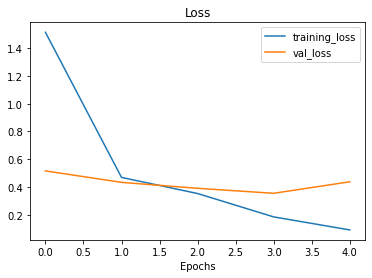

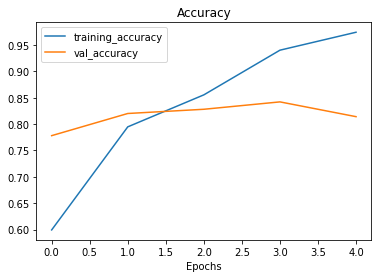

In [31]:
plot_loss_curves(history_4)

Ideally, thse curves would follow each other. But, as we can see, the val loss and val accuracy stop following the training pretty quickly. i.e. the training accuracy and loss are improving but not evaluating on the validation data

In [32]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


## Adjusting Model Parameters

Fitting a ML model comes in 3 steps:
* create a baseline
* beat the baseline by overfitting a large model
* reduce overfitting

Using the structure of the baseline model we could try 'overfitting' the data more by adding more convolutions layers or filters,  or more neurons or more dense layers after the flatten layer.

But, we are moving on to reduce overfitting. Do accomplish this we will build 2 more models:
* a CNN with max pooling
* a CNN with max pooling and data augmentation

the structure is:

input -> conv layers -> ReLu layers -> max pooling layers -> fully connected Dense layers as output

In [33]:
# model 4 but with max pooling layers aftereach conv2D layer
model_5 = Sequential([
          Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
          MaxPool2D(pool_size = 2), # reduce numbver of features by half  
          Conv2D(10, 3, activation = 'relu'),
          MaxPool2D(),
          Conv2D(10, 3, activation = 'relu'),
          MaxPool2D(),
          Flatten(),
          Dense(1, activation = 'sigmoid')
])


 If convolutional layers learn the features of an image you can think of a Max Pooling layer as figuring out the most important of those features. We'll see this an example of this in a moment.

In [34]:
# compile the model
model_5.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

In [35]:
# fit the model
history_5 = model_5.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 234ms/step - loss: 0.6765 - accuracy: 0.6027 - val_loss: 0.5765 - val_accuracy: 0.7200
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.5137 - accuracy: 0.7613 - val_loss: 0.4401 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 11s 228ms/step - loss: 0.4413 - accuracy: 0.8053 - val_loss: 0.3851 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4260 - accuracy: 0.8140 - val_loss: 0.3703 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3875 - accuracy: 0.8373 - val_loss: 0.3600 - val_accuracy: 0.8580


In [36]:
model_5.summary()
# notice how the dimentions of the pooling layers change
# filtering out some patterns/features thayt may be less important

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

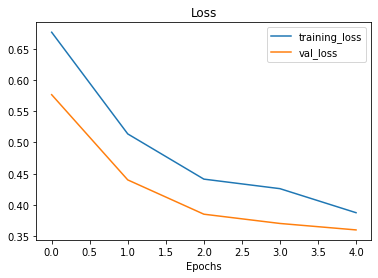

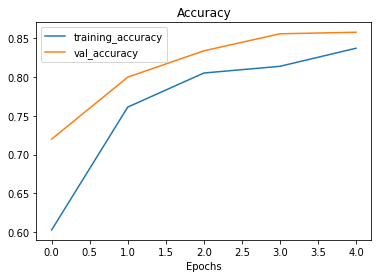

In [37]:
plot_loss_curves(history_5)

This result is better. But, as the validation loss increases at the end, there may still be over fitting

### Data Augmentation

In [38]:
# code first
# create ImageDataGenerator training isntance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale = 1/255.,
                                          rotation_range=20,
                                          shear_range  = .2,
                                          zoom_range = .2, 
                                          width_shift_range =.2,
                                          height_shift_range = .2,
                                          horizontal_flip = True)
# create ImageDataGenerator training instance with no augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# same for test
test_datagen = ImageDataGenerator(rescale = 1/255.)

Data augmentation is the process of altering our training data, leading to it having more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Prevents overfitting & gives examples of trainingdata that may not be like the OG data

In [39]:
# import data and augment it from training directory

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                   target_size=(224,224),
                                                                   batch_size =32,
                                                                   class_mode = 'binary',
                                                                   shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size =(224, 224),
                                               batch_size = 32,
                                               class_mode = 'binary',
                                               shuffle = False)
# Shuffle = False just for compasrisons sake
test_data = test_datagen.flow_from_directory(test_dir, 
                                             target_size = (224,224),
                                             batch_size = 32,
                                             class_mode = 'binary') 

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [40]:
# visualize the augmented data
# get data batch samples
images, labels = train_data.next()
aug_images, aug_labels = train_data_augmented.next()

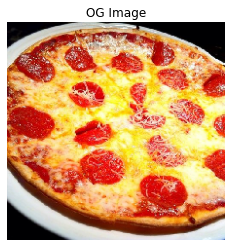

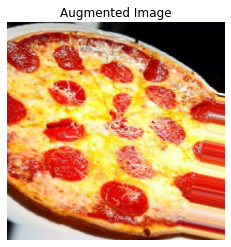

In [41]:
rand_num = random.randint(0,31),
plt.imshow(images[rand_num])
plt.title('OG Image') 
plt.axis(False)
plt.figure(2)
plt.imshow(aug_images[rand_num])
plt.title('Augmented Image')
plt.axis(False);

In [42]:
# See howe the augmented training images do when used for a model
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape = (224, 224, 3)),
  MaxPool2D(pool_size = 2), 
  Conv2D(10, 3, activation = 'relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation = 'relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = 'sigmoid')
])

# compile
model_6.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])

# fit
history_6 = model_6.fit(train_data_augmented,
                        epochs = 5,
                        steps_per_epoch = len(train_data_augmented),
                        validation_data = test_data,
                        validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 27s 562ms/step - loss: 0.7099 - accuracy: 0.4540 - val_loss: 0.6856 - val_accuracy: 0.5040
Epoch 2/5
47/47 [==============================] - 26s 560ms/step - loss: 0.6980 - accuracy: 0.5467 - val_loss: 0.6655 - val_accuracy: 0.7380
Epoch 3/5
47/47 [==============================] - 26s 558ms/step - loss: 0.6821 - accuracy: 0.6173 - val_loss: 0.6392 - val_accuracy: 0.7100
Epoch 4/5
47/47 [==============================] - 26s 559ms/step - loss: 0.6860 - accuracy: 0.5507 - val_loss: 0.6172 - val_accuracy: 0.7760
Epoch 5/5
47/47 [==============================] - 26s 558ms/step - loss: 0.6299 - accuracy: 0.7333 - val_loss: 0.5356 - val_accuracy: 0.7280


> 2 things:


* our model results were bad to start off because we didnt shuffle the OG data: ie its going through all pizza then steak
* it took longer to train bc the data is augmented during this process. It leaves the OG images unchanged but takes longer to fit

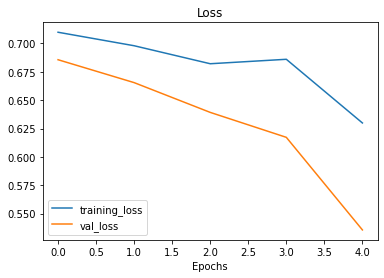

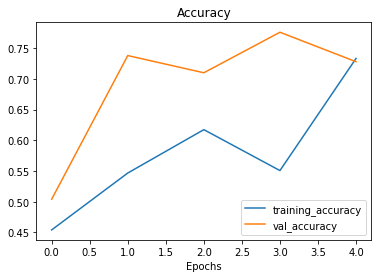

In [43]:
# check performance history
plot_loss_curves(history_6)

In [44]:
# trying again with shuffled inputs

In [45]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
          target_size = (224, 224),
          batch_size = 32,
          class_mode = 'binary',
          shuffle = True )


Found 1500 images belonging to 2 classes.


In [46]:
# create model
model_7 = Sequential([
  Conv2D(10, 3, input_shape = (224, 224, 3), activation = 'relu'),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10,3, activation = 'relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation = 'sigmoid')                    
])

model_7.compile(loss = 'binary_crossentropy',
                optimizer = Adam(),
                metrics = ['accuracy'])
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        batch_size=32,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data = test_data,
                        validation_steps = len(test_data)

                        )

Epoch 1/5
47/47 [==============================] - 27s 570ms/step - loss: 0.6509 - accuracy: 0.6140 - val_loss: 0.5553 - val_accuracy: 0.6840
Epoch 2/5
47/47 [==============================] - 26s 558ms/step - loss: 0.5268 - accuracy: 0.7347 - val_loss: 0.4821 - val_accuracy: 0.7560
Epoch 3/5
47/47 [==============================] - 26s 557ms/step - loss: 0.4898 - accuracy: 0.7680 - val_loss: 0.3781 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 26s 557ms/step - loss: 0.4904 - accuracy: 0.7707 - val_loss: 0.3508 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 26s 554ms/step - loss: 0.4663 - accuracy: 0.7840 - val_loss: 0.3553 - val_accuracy: 0.8540


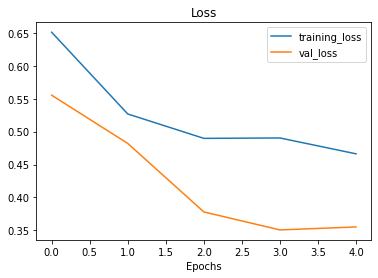

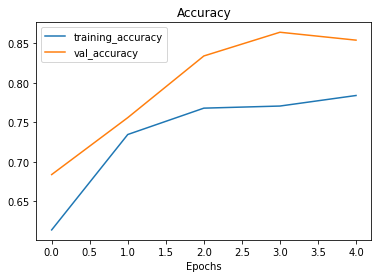

In [47]:
plot_loss_curves(history_7) # aight

## Conv2D Parameters
* **Filters**: number of filters the convolutional layer will learn. Recommended that you keep the same or increase the filters as the NN gets deeper. Recommended to keep them as a power of 2 as well. 
* **kernel_size**: size of the kernel being passed over an image. Must be odd and > 3. 3 is a good starting point but if the input is pretty large you can use 5 or 7.
* **strides**: the step of the convolution along both axes, default is (1,1), but (2,2) may also be used to decrease the output volume.
* **padding**: changes how edge cases are handeled as well as the output size. either 'valid' or 'same'. Valid does no pooling, same produces the same output size i.e preserves the input size. Recommended to use 'same' until you want to reduce dimentions.
* **data_format**: chanels first vs channels last ((224, 224, 3) vs (3, 224, 224)). Recomended to not use this and deal with this outside of the NN.
* **dilation_rate**: to be discussed...
* **kernel_initializer**: keep as is but can change to he_normal for deeper NN's
* **kernel_regularizer**, **bias_regularizer**, and **activity_regularizer**: reduces effects of overfitting and helps the ability of the model to generalize

  * *a must* when working with deep NN's and very large sets of data. Ex: kernel_regularizer=l2(0.0005))
  l1 or l2, rec: use l2 used when overfitting is detected

In [48]:
## Making some predictions

In [49]:
print(class_names)

['.DS_Store' 'pizza' 'steak']


--2021-11-08 19:13:57--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-11-08 19:13:57 (31.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

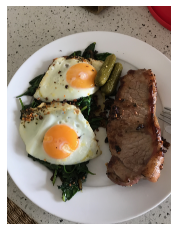

In [50]:
# view our example images
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [51]:
steak.shape

(4032, 3024, 3)

In [52]:
# reshaping the image
def load_and_prep_image(filename, img_shape = 224):
  '''
  reads an image from a filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape, 3)
  '''
  img = tf.io.read_file(filename) # read target image
  # decode read file into tensor and ensure 3 color channels
  img = tf.image.decode_image(img, channels = 3) 
  # resize the image
  img = tf.image.resize(img, size = [img_shape,img_shape])
  # rescale image
  img = img / 255
  return img



In [53]:
steak = load_and_prep_image('03-steak.jpeg')
steak.shape

TensorShape([224, 224, 3])

`# make pred with new image`
`#model_7.predict(steak)`

This gives an error because batch size is a dimention

ie our data was trained in the shape (batch_size, 224, 224, 3)

we can fix this by adding a dimention using tf.expand_dims


In [54]:
# add extra axis
print(f'shape before new dimention: {steak.shape}')
steak = tf.expand_dims(steak, axis = 0)
# or steak = steak[tf.newaxis, 224, 224, 3]
print(f'shape adter new dim: {steak.shape}')

shape before new dimention: (224, 224, 3)
shape adter new dim: (1, 224, 224, 3)


In [55]:
# now predict
pred = model_7.predict(steak)
pred
# this result is a prediction probability

array([[0.9446881]], dtype=float32)

In [56]:
# convert pred prob to class name by indexing class_names with the rounded prob
# adding 1 because 'DS._store' is in class_names
# theres very likley a much better way to do this
pred_class = class_names[int(tf.round(pred)[0][0])+1]

pred_class

'steak'

In [57]:
def pred_and_plot(model, filename, class_names):
  '''
  combining what we did above into a function that plots and predicts a new image
  '''
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])+1]

  plt.imshow(img)
  plt.title(f'prediction: {pred_class}')
  plt.axis(False);

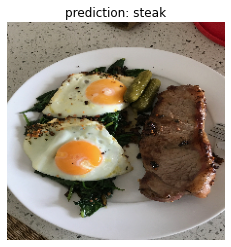

In [58]:
pred_and_plot(model_7, '03-steak.jpeg', class_names)
# Noice

--2021-11-08 19:14:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-11-08 19:14:00 (42.6 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



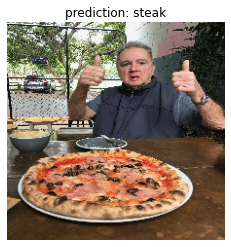

In [59]:
# DL another test image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg 
pred_and_plot(model_7, "03-pizza-dad.jpeg", class_names)

# Multi-Class Classification

## Import and Become One With the Data

In [60]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

--2021-11-08 19:14:01--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   172MB/s    in 2.9s    

2021-11-08 19:14:04 (172 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [64]:
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [66]:
import os 
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f'there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

there are 2 directories and 0 images in 10_food_classes_all_data
there are 10 directories and 0 images in 10_food_classes_all_data/test
there are 0 directories and 250 images in 10_food_classes_all_data/test/hamburger
there are 0 directories and 250 images in 10_food_classes_all_data/test/ramen
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_curry
there are 0 directories and 250 images in 10_food_classes_all_data/test/steak
there are 0 directories and 250 images in 10_food_classes_all_data/test/pizza
there are 0 directories and 250 images in 10_food_classes_all_data/test/fried_rice
there are 0 directories and 250 images in 10_food_classes_all_data/test/ice_cream
there are 0 directories and 250 images in 10_food_classes_all_data/test/grilled_salmon
there are 0 directories and 250 images in 10_food_classes_all_data/test/chicken_wings
there are 0 directories and 250 images in 10_food_classes_all_data/test/sushi
there are 10 directories and 0 images in 10_fo

In [72]:
# set up training and testing directory paths
train_dir2 = '10_food_classes_all_data/train/'
test_dir2 = '10_food_classes_all_data/test/'

In [74]:
# get class names from the subdirectories
import pathlib
import numpy as np
data_dir2 = pathlib.Path(train_dir2)
class_names2 = np.array(sorted([item.name for item in data_dir2.glob('*')]))
print(class_names2)


['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


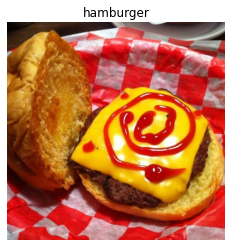

In [87]:
import random
img = view_rand_image(target_dir=train_dir2,
                      target_class = random.choice(class_names2))

## Preprocess Data

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_multi = ImageDataGenerator(1/255)
test_datagen_multi = ImageDataGenerator(1/255)

train_data_multi = train_datagen_multi.flow_from_directory(train_dir2,
                                                           target_size = (224, 224),
                                                           batch_size = 32,
                                                           class_mode='categorical')
test_data_multi = test_datagen_multi.flow_from_directory(test_dir2, 
                                                         target_size = (224, 224),
                                                         batch_size = 32,
                                                         class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Creating a Model 

Again Using TinyVGG as baseine

In [91]:
model_9 = Sequential([
       Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
       Conv2D(10, 3, activation = 'relu'),
       MaxPool2D(),
       Conv2D(10, 3, activation = 'relu'),   
       Conv2D(10, 3, activation = 'relu'), 
       MaxPool2D(),
       Flatten(),
       Dense(10, activation = 'softmax')           
])

model_9.compile(loss = 'categorical_crossentropy',
                optimizer = Adam(),
                metrics= ['accuracy'])
history_9 = model_9.fit(train_data_multi,
                        epochs = 5, 
                        steps_per_epoch = (len(train_data_multi)),
                        validation_data = test_data_multi,
                        validation_steps=len(test_data_multi))

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/5
235/235 [==============================] - 60s 252ms/step - loss: 3.4382 - accuracy: 0.1189 - val_loss: 2.2951 - val_accuracy: 0.1288
Epoch 2/5
235/235 [==============================] - 58s 246ms/step - loss: 2.2236 - accuracy: 0.1877 - val_loss: 2.2826 - val_accuracy: 0.1516
Epoch 3/5
235/235 [==============================] - 58s 248ms/step - loss: 1.9758 - accuracy: 0.3068 - val_loss: 2.3491 - val_accuracy: 0.1628
Epoch 4/5
235/235 [==============================] - 59s 253ms/step - loss: 1.4324 - accuracy: 0.5137 - val_loss: 2.8112 - val_accuracy: 0.1468
Epoch 5/5
235/235 [==============================] - 59s 249ms/step - loss: 0.8755 - accuracy: 0.7117 - val_loss: 3.6162 - val_accuracy: 0.1528


In [ ]:
More data so it takes longer